# How to find and treat outliers using Python

In this notebook I will develop different techniques to detect and treat outliers in order to create examples for the following article published on Medium.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In this occasion I will use the 'tips' dataset that comes with the Seaborn library.

In [3]:
# Import seaborn 
import seaborn as sns

# Load tips dataset
taxis = sns.load_dataset('taxis')
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

## Univariate Outlier Detection

There are several techniques to identify outliers in a dataset, including visual inspection methods, statistical methods and even machine learning models such as the Local Outlier Factor (LOF), the Isolation Forest or the KNN algorithm.
However, for the case of univariate outliers, we can use statistical and visual inspection methods. In this article, I will explain the following:

* Histograms.
* Box plots.
* Z-score.
* Modified Z-score.
* Interquantile Range (IQR).

As a preliminary step, it is highly recommendable to use the 'describe()' method to get a quick overview of the data distribution and detect the presence of outliers in the dataset. In order to do this, we will look for noticeable differences between the minimum, mean and maximum values of the target variable. In this case, we will use the variable 'total', which indicates the total price of the taxi-ride.

In [4]:
taxis['total'].describe()

count    6433.000000
mean       18.517794
std        13.815570
min         1.300000
25%        10.800000
50%        14.160000
75%        20.300000
max       174.820000
Name: total, dtype: float64

The values are 1.3, 18.52 and 174.82 for the minimum, mean and maximum, respectively. The difference between the minimum and the maximum, and between the mean and the maximum value suggest that there may be outliers in the dataset. To confirm this suspicion we can use any of the following methods.

### Histogram

In [5]:
# Set an style for all charts
sns.set_style('darkgrid')

Text(0.5, 0, 'Total paid per trip')

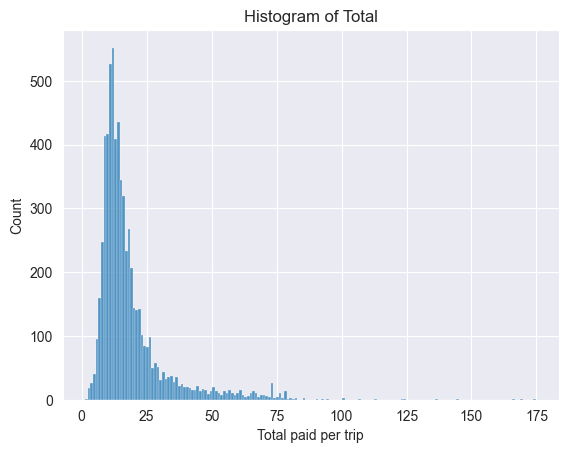

In [6]:
# Create a histogram using Seaborn
g = sns.histplot(data = taxis, x = 'total')

# Add labels
g.set_title('Histogram of Total')
g.set_xlabel('Total paid per trip')

## Box plot

Text(0.5, 0, 'Total paid per trip')

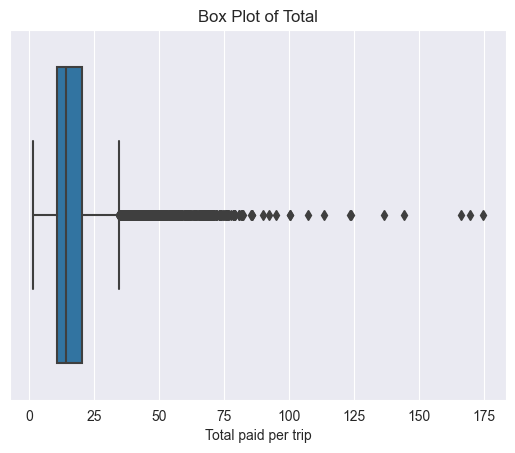

In [7]:
# Create a box plot 
g = sns.boxplot(data = taxis, x = 'total')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')

## Z-score

In [8]:
# Import zscore function
from scipy.stats import zscore

# Calculate z-score for each data point in the column and compute its absolute value
z_scores = zscore(taxis['total'])
abs_z_scores = np.abs(z_scores)

# Select the outliers using a threshold of 3
outliers = taxis[abs_z_scores > 3]

In [9]:
# Show result
outliers.head()

pickup             dropoff  passengers  distance  fare  \
42  2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00  80.0   
56  2019-03-05 17:57:00 2019-03-05 18:45:25           2     19.59  52.0   
162 2019-03-06 17:36:48 2019-03-06 18:43:39           2     17.10  52.0   
188 2019-03-26 15:06:47 2019-03-26 15:59:52           1     18.41  52.0   
225 2019-03-22 15:36:34 2019-03-22 16:34:48           2     12.07  48.5   

       tip  tolls   total   color      payment       pickup_zone  \
42   20.08   0.00  100.38  yellow  credit card               NaN   
56    0.00   5.76   65.56  yellow  credit card       JFK Airport   
162  13.10   5.76   78.66  yellow  credit card     Midtown South   
188   0.02   5.76   61.08  yellow  credit card       JFK Airport   
225  11.51   5.76   69.07  yellow  credit card  Manhattan Valley   

              dropoff_zone pickup_borough dropoff_borough  
42                     NaN            NaN             NaN  
56   Upper East Side North         Queens       Manhattan  
162            JFK Airport      Manhattan          Queens  
188         Midtown Center         Queens       Manhattan  
225            Boerum Hill      Manhattan        Brooklyn

In [10]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 185


## Modified Z-score

![IMG](https://github.com/MartaCasdelg/Private_Medium_Articles/blob/main/1_Outliers_using_Python/Images/z-score-modified_ENG.png)

The scipy function median_abs_deviation allows us to calculate the absolute deviation of the median (MAD), which we can then insert into the formula to obtain the modified z-score for each data point.

In [11]:
# Import the median_abs_deviation function
from scipy.stats import median_abs_deviation

# Obtain the MAD value 
mad_score = median_abs_deviation(taxis['total'])
mad_score

4.199999999999999

We can also do it manually with the following code, the result is the same.

In [12]:
# Find the median
median = taxis['total'].median()

# Find the absolute value of differences between the median and each data point
abs_diffs = (taxis['total'] - median).abs()

# Take the median of differences
mad_score = abs_diffs.median()
mad_score

4.199999999999999

However, this formula is already implemented as the MAD estimator in the PyOD library, so there is no need to perform the above calculation. We can use it as follows:

In [13]:
# Import MAD estimator
from pyod.models.mad import MAD

# Set threshold to 3.5
mad = MAD(threshold = 3.5)

# Convert the 'total' column into a 2D numpy array
total_reshaped = taxis['total'].values.reshape(-1, 1)

# Generate inline and outlier labels
labels = mad.fit(total_reshaped).labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Obtain number of outliers
print(f'Number of outliers: {labels.sum()}')

Number of outliers: 560


In [15]:
outliers = taxis[labels == 1]
outliers.head()

pickup             dropoff  passengers  distance  fare    tip  \
3  2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   6.15   
22 2019-03-28 17:20:54 2019-03-28 17:55:57           1      9.82  31.5   8.31   
40 2019-03-07 15:15:46 2019-03-07 15:50:14           1      7.51  27.0   6.06   
42 2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00  80.0  20.08   
53 2019-03-20 18:49:24 2019-03-20 19:12:40           1     13.45  36.0   0.00   

    tolls   total   color      payment        pickup_zone  \
3    0.00   36.95  yellow  credit card          Hudson Sq   
22   5.76   49.87  yellow  credit card  LaGuardia Airport   
40   0.00   36.36  yellow  credit card           Flatiron   
42   0.00  100.38  yellow  credit card                NaN   
53   0.00   37.80  yellow         cash        JFK Airport   

                     dropoff_zone pickup_borough dropoff_borough  
3                  Yorkville West      Manhattan       Manhattan  
22  Sutton Place/Turtle Bay North         Queens       Manhattan  
40                Carroll Gardens      Manhattan        Brooklyn  
42                            NaN            NaN             NaN  
53                      Sunnyside         Queens          Queens

## IQR

In [16]:
# Calculate the percentiles
seventy_fifth = taxis['total'].quantile(0.75)
twenty_fifth = taxis['total'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset 
outliers = taxis[(taxis['total'] < lower) | (taxis['total'] > upper)]
outliers.head()

pickup             dropoff  passengers  distance  fare    tip  \
3  2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   6.15   
22 2019-03-28 17:20:54 2019-03-28 17:55:57           1      9.82  31.5   8.31   
40 2019-03-07 15:15:46 2019-03-07 15:50:14           1      7.51  27.0   6.06   
42 2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00  80.0  20.08   
43 2019-03-27 19:39:16 2019-03-27 20:00:26           1      9.50  28.0   0.00   

    tolls   total   color      payment        pickup_zone  \
3    0.00   36.95  yellow  credit card          Hudson Sq   
22   5.76   49.87  yellow  credit card  LaGuardia Airport   
40   0.00   36.36  yellow  credit card           Flatiron   
42   0.00  100.38  yellow  credit card                NaN   
43   5.76   35.06  yellow         cash  LaGuardia Airport   

                     dropoff_zone pickup_borough dropoff_borough  
3                  Yorkville West      Manhattan       Manhattan  
22  Sutton Place/Turtle Bay North         Queens       Manhattan  
40                Carroll Gardens      Manhattan        Brooklyn  
42                            NaN            NaN             NaN  
43       Washington Heights South         Queens       Manhattan

In [17]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 600


# How to treat outliers

## Remove

In [18]:
taxis_filtered = taxis.copy()
taxis_filtered = taxis_filtered[labels == 0]

## Imputation

In [20]:
# Calculate the median
median_value = taxis['total'].median()

# Impute outliers with the median
taxis_imputed = taxis.copy()
taxis_imputed.loc[outliers.index, 'total'] = median_value

## Winsorization

In [22]:
from scipy.stats.mstats import winsorize

taxis_winsorized = taxis.copy()
taxis_winsorized['Total'] = winsorize(taxis_winsorized['total'], limits = [0.05, 0.05], inplace = True)

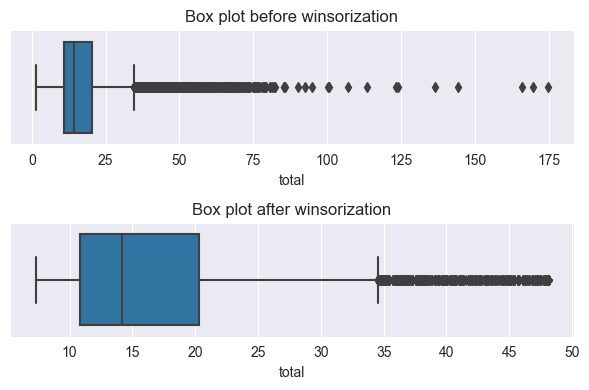

In [23]:
# Create a fig and axis for a 2x1 grid

fig, axes = plt.subplots(2, 1, figsize = (6, 4))

#  Create a box plot before and after winsorization
sns.boxplot(data = taxis, x = 'total', ax = axes[0])
sns.boxplot(data = taxis_winsorized, x = 'total', ax = axes[1])

# Add labels and titles to each plot
axes[0].set_title('Box plot before winsorization')
axes[1].set_title('Box plot after winsorization')

plt.tight_layout()